In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [11]:
class_names[y_train[0]]

'coat'

In [12]:
y_train[0]

4

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [17]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [23]:
model.get_layer('dense_3') is hidden1

True

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.7230 - accuracy: 0.7613 - val_loss: 0.5031 - val_accuracy: 0.8298
Epoch 2/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4871 - accuracy: 0.8300 - val_loss: 0.4843 - val_accuracy: 0.8276
Epoch 3/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4416 - accuracy: 0.8458 - val_loss: 0.4346 - val_accuracy: 0.8504
Epoch 4/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4138 - accuracy: 0.8539 - val_loss: 0.4143 - val_accuracy: 0.8534
Epoch 5/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3937 - accuracy: 0.8616 - val_loss: 0.3858 - val_accuracy: 0.8698
Epoch 6/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3771 - accuracy: 0.8662 - val_loss: 0.3768 - val_accuracy: 0.8688
Epoch 7/30
55000/55000 [==============================] -

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

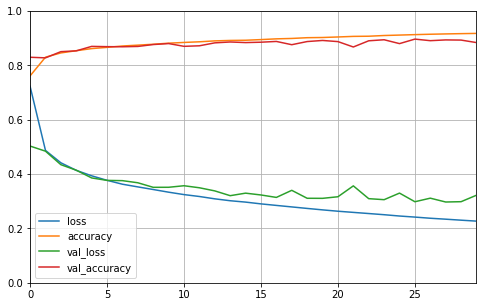

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0 - 1]
plt.show()

In [28]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 31us/sample - loss: 65.5789 - accuracy: 0.8495


[65.5789458267212, 0.8495]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [33]:
import numpy as np

In [34]:
np.array(class_names)[y_pred]

array(['ankle boot', 'pullover', 'trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
housing = fetch_california_housing()

In [66]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [74]:
optimizer = keras.optimizers.SGD(lr=0.001)

In [75]:
model.compile(loss = 'mean_squared_error', optimizer = optimizer)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4248 - val_loss: 0.3956
Epoch 2/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4219 - val_loss: 0.3926
Epoch 3/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4191 - val_loss: 0.3905
Epoch 4/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4166 - val_loss: 0.3872
Epoch 5/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4143 - val_loss: 0.3842
Epoch 6/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4122 - val_loss: 0.3840
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4101 - val_loss: 0.3809
Epoch 8/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4083 - val_loss: 0.3786
Epoch 9/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4065 - val_l

In [76]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3897


In [77]:
X_new = X_test[:3] # pretend these are new instances 

In [78]:
y_pred = model.predict(X_new)

In [79]:
y_pred

array([[0.4342409],
       [1.8147109],
       [3.3924901]], dtype=float32)

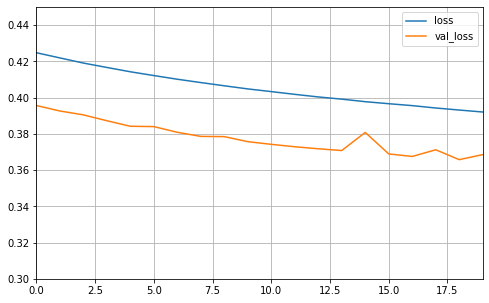

In [89]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.3, 0.45)
plt.show()

In [92]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # Input object
hidden1 = keras.layers.Dense(30, activation='relu')(input_) # Dense layer with 30 neurons, input_ is called which passes it
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) # Dense layer with 30 neurons, hidden1 is called whic passes it to the next
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [93]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 30)           930         dense_20[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_21[0][0]               

In [94]:
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 45us/sample - loss: 1.8737 - val_loss: 3.0492
Epoch 2/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.6683 - val_loss: 1.1377
Epoch 3/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.6017 - val_loss: 0.5548
Epoch 4/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5638 - val_loss: 0.6451
Epoch 5/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5383 - val_loss: 0.7438
Epoch 6/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5208 - val_loss: 0.5584
Epoch 7/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5023 - val_loss: 0.5218
Epoch 8/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4891 - val_loss: 0.4561
Epoch 9/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4767 - val_l

In [95]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.4150


0.415037772798723

In [96]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [97]:
model.compile(loss='mse', optimizer=opt)

In [98]:
x_train_a, x_train_b = X_train[:, :5], X_train[:, 2:]
x_valid_a, x_valid_b = X_valid[:, :5], X_valid[:, 2:]
x_test_a, x_test_b = X_test[:, :5], X_test[:, 2:]
x_new_a, x_new_b = x_test_a[:3], x_test_b[:3]

In [99]:
history = model.fit((x_train_a, x_train_b), y_train, epochs=20, validation_data=((x_valid_a, x_valid_b), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 45us/sample - loss: 1.9991 - val_loss: 1.0075
Epoch 2/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.7938 - val_loss: 0.6976
Epoch 3/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6527 - val_loss: 0.6241
Epoch 4/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6001 - val_loss: 0.5800
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5672 - val_loss: 0.5550
Epoch 6/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5425 - val_loss: 0.5244
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5226 - val_loss: 0.5056
Epoch 8/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5070 - val_loss: 0.4827
Epoch 9/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4943 - val_l

In [100]:
mse_test = model.evaluate((x_test_a, x_test_b), y_test)

5160/5160 [==============================] - 0s 19us/sample - loss: 0.4291


In [101]:
y_pred = model.predict((x_new_a, x_new_b))

In [102]:
y_pred

array([[0.5409853],
       [1.9047799],
       [3.266901 ]], dtype=float32)

In [103]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [104]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=opt)

In [106]:
history = model.fit([x_train_a, x_train_b], [y_train, y_train], epochs=20, validation_data=([x_valid_a, x_valid_b], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 58us/sample - loss: 2.2402 - main_output_loss: 1.9199 - aux_output_loss: 5.1157 - val_loss: 3.1638 - val_main_output_loss: 2.6007 - val_aux_output_loss: 8.2193
Epoch 2/20
11610/11610 [==============================] - 1s 45us/sample - loss: 1.0753 - main_output_loss: 0.8518 - aux_output_loss: 3.0880 - val_loss: 1.6513 - val_main_output_loss: 0.9707 - val_aux_output_loss: 7.7702
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.8519 - main_output_loss: 0.7045 - aux_output_loss: 2.1783 - val_loss: 1.3147 - val_main_output_loss: 0.6829 - val_aux_output_loss: 6.9957
Epoch 4/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.7540 - main_output_loss: 0.6401 - aux_output_loss: 1.7769 - val_loss: 1.1449 - val_main_output_loss: 0.6071 - val_aux_output_loss: 5.9808
Epoch 5/20
11610/11610 [==============================] - 0s 37us/s

In [107]:
total_loss, main_losss, aux_loss = model.evaluate([x_test_a, x_test_b], [y_test, y_test])

5160/5160 [==============================] - 0s 22us/sample - loss: 0.4870 - main_output_loss: 0.4305 - aux_output_loss: 0.9978


In [108]:
y_pred_main, y_pred_aux = model.predict([x_new_a, x_new_b])

In [110]:
y_pred_main

array([[0.3541407],
       [2.024794 ],
       [3.130018 ]], dtype=float32)

In [111]:
y_pred_aux

array([[1.086978 ],
       [1.9836444],
       [2.4403   ]], dtype=float32)

In [113]:
np.random.seed(42)
tf.random.set_seed(42)

In [114]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape=[8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [115]:
model.compile(loss='mse', optimizer = opt)
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 55us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4576 - val_l

In [116]:
model.save('my_keras_model.h5')

In [117]:
model = keras.models.load_model('my_keras_model.h5')

In [118]:
model.predict(X_new)

array([[0.551559 ],
       [1.6555369],
       [3.0014234]], dtype=float32)

In [119]:
model.save_weights('my_keras_weights.ckpt')

In [120]:
model.load_weights('my_keras_weights.ckpt')

In [121]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [122]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [123]:
model.compile(loss='mse', optimizer=opt)
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5')
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 45us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4576 - val_l

In [124]:
model.compile(loss='mse', optimizer=opt)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4385 - val_loss: 0.4287
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4319 - val_loss: 0.4117
Epoch 3/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4252 - val_loss: 0.3975
Epoch 4/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4199 - val_loss: 0.3943
Epoch 5/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4150 - val_loss: 0.3964
Epoch 6/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4110 - val_loss: 0.3907
Epoch 7/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4070 - val_loss: 0.3823
Epoch 8/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4036 - val_loss: 0.3786
Epoch 9/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.400

Epoch 76/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3341 - val_loss: 0.3196
Epoch 77/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3338 - val_loss: 0.3608
Epoch 78/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3336 - val_loss: 0.3295
Epoch 79/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3331 - val_loss: 0.3927
Epoch 80/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3332 - val_loss: 0.3167
Epoch 81/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3317 - val_loss: 0.3783
Epoch 82/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3322 - val_loss: 0.3154
Epoch 83/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3315 - val_loss: 0.3538
Epoch 84/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3312 - val_loss: 0.3282
Epoch 85/100
11610/

In [125]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [127]:
val_train_ratio_callback = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_callback])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
10112/11610 [=========================>....] - ETA: 0s - loss: 0.3202
val/train: 1.16
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3256 - val_loss: 0.3785
Epoch 2/10
10240/11610 [=========================>....] - ETA: 0s - loss: 0.3245
val/train: 0.97
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3257 - val_loss: 0.3145
Epoch 3/10
10240/11610 [=========================>....] - ETA: 0s - loss: 0.3235
val/train: 1.13
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3250 - val_loss: 0.3659
Epoch 4/10
11392/11610 [============================>.] - ETA: 0s - loss: 0.3255
val/train: 0.96
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3250 - val_loss: 0.3119
Epoch 5/10
10752/11610 [==========================>...] - ETA: 0s - loss: 0.3233
val/train: 1.12
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3244 - val

In [129]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [136]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model


In [138]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [140]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 45us/sample - loss: 1.0374 - val_loss: 3.3394
Epoch 2/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5436 - val_loss: 2.5033
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4851 - val_loss: 0.7090
Epoch 4/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4501 - val_loss: 0.4999
Epoch 5/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4328 - val_loss: 0.4002
Epoch 6/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4228 - val_loss: 0.4312
Epoch 7/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4165 - val_loss: 0.4030
Epoch 8/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4113 - val_loss: 0.3829
Epoch 9/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.407

In [141]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [144]:
param_distribs = {
    'n_hidden' : [0, 1, 2, 3],
    'n_neurons' : np.arange(1, 100),
    'learning_rate' : reciprocal(3e-4, 3e-2)
}

In [145]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 50us/sample - loss: 3.7147 - val_loss: 1.7484
Epoch 2/100
7740/7740 [==============================] - 0s 27us/sample - loss: 1.2561 - val_loss: 0.8920
Epoch 3/100
7740/7740 [==============================] - 0s 28us/sample - loss: 0.8183 - val_loss: 0.8955
Epoch 4/100
7740/7740 [==============================] - 0s 29us/sample - loss: 0.7155 - val_loss: 1.0164
Epoch 5/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.6835 - val_loss: 0.7203
Epoch 6/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.6597 - val_loss: 0.7317
Epoch 7/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.6411 - val_loss: 0.9878
Epoch 8/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6337 - val_loss: 0.6067
Epoch 9/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6185 - val_loss: 0.576

Epoch 42/100
7740/7740 [==============================] - 0s 28us/sample - loss: 0.5015 - val_loss: 20.7167
Epoch 43/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5011 - val_loss: 20.7559
Epoch 44/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5006 - val_loss: 20.6051
Epoch 45/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5005 - val_loss: 20.5465
Epoch 46/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5004 - val_loss: 20.4189
Epoch 47/100
7740/7740 [==============================] - 0s 29us/sample - loss: 0.5002 - val_loss: 20.4583
Epoch 48/100
7740/7740 [==============================] - 0s 28us/sample - loss: 0.5001 - val_loss: 20.4698
Epoch 49/100
7740/7740 [==============================] - 0s 28us/sample - loss: 0.5000 - val_loss: 20.5012
Epoch 50/100
7740/7740 [==============================] - 0s 29us/sample - loss: 0.4999 - val_loss: 20.4808
Epoch 51/100
7740/7740 [====

3870/3870 [==============================] - 0s 14us/sample - loss: 0.9088
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 48us/sample - loss: 2.5637 - val_loss: 99.2314
Epoch 2/100
7740/7740 [==============================] - 0s 28us/sample - loss: 0.8325 - val_loss: 117.8748
Epoch 3/100
7740/7740 [==============================] - 0s 27us/sample - loss: 3.7997 - val_loss: 198.9456
Epoch 4/100
7740/7740 [==============================] - 0s 28us/sample - loss: 2.3015 - val_loss: 304.6343
Epoch 5/100
7740/7740 [==============================] - 0s 26us/sample - loss: 7.2961 - val_loss: 544.5842
Epoch 6/100
7740/7740 [==============================] - 0s 29us/sample - loss: 5.6331 - val_loss: 1000.6067
Epoch 7/100
7740/7740 [==============================] - 0s 37us/sample - loss: 22.4476 - val_loss: 1919.8352
Epoch 8/100
7740/7740 [==============================] - 0s 28us/sample - loss: 45.1861 - val_loss: 3846.0303
Epoch 9/1

7740/7740 [==============================] - 0s 39us/sample - loss: 0.5351 - val_loss: 0.9527
Epoch 17/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5246 - val_loss: 1.0866
Epoch 18/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5147 - val_loss: 1.1268
Epoch 19/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5057 - val_loss: 1.2202
Epoch 20/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4968 - val_loss: 1.3030
Epoch 21/100
3870/3870 [==============================] - 0s 16us/sample - loss: 0.5214
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 59us/sample - loss: 2.8740 - val_loss: 6.1228
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.1529 - val_loss: 1.6205
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.8046 - val_loss: 0.8508
Epoch 4/100
7740/7740 [=

7740/7740 [==============================] - 0s 37us/sample - loss: 0.6297 - val_loss: 0.6356
Epoch 9/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6025 - val_loss: 0.5856
Epoch 10/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5821 - val_loss: 0.5558
Epoch 11/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5653 - val_loss: 0.5336
Epoch 12/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5507 - val_loss: 0.5186
Epoch 13/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5376 - val_loss: 0.5064
Epoch 14/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5256 - val_loss: 0.4963
Epoch 15/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5152 - val_loss: 0.4873
Epoch 16/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5050 - val_loss: 0.4797
Epoch 17/100
7740/7740 [===========================

7740/7740 [==============================] - 0s 38us/sample - loss: 0.4585 - val_loss: 1.0807
Epoch 28/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4551 - val_loss: 1.0764
Epoch 29/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4518 - val_loss: 1.0604
Epoch 30/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4486 - val_loss: 1.0515
Epoch 31/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4455 - val_loss: 1.0532
Epoch 32/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4429 - val_loss: 1.0396
Epoch 33/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4401 - val_loss: 1.0361
Epoch 34/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4377 - val_loss: 1.0298
Epoch 35/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4353 - val_loss: 1.0167
Epoch 36/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 37us/sample - loss: 0.5702 - val_loss: 0.6148
Epoch 23/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5609 - val_loss: 0.6052
Epoch 24/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5521 - val_loss: 0.5992
Epoch 25/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5436 - val_loss: 0.5904
Epoch 26/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5353 - val_loss: 0.5858
Epoch 27/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5275 - val_loss: 0.5800
Epoch 28/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5200 - val_loss: 0.5719
Epoch 29/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5129 - val_loss: 0.5663
Epoch 30/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5060 - val_loss: 0.5607
Epoch 31/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 61us/sample - loss: 1.5411 - val_loss: 1.0746
Epoch 2/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.7454 - val_loss: 16.3645
Epoch 3/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.7378 - val_loss: 37.4787
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.2376 - val_loss: 63.6770
Epoch 5/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.9311 - val_loss: 108.7644
Epoch 6/100
7740/7740 [==============================] - 0s 32us/sample - loss: 2.0831 - val_loss: 290.4642
Epoch 7/100
7740/7740 [==============================] - 0s 31us/sample - loss: 5.0396 - val_loss: 732.4059
Epoch 8/100
7740/7740 [==============================] - 0s 30us/sample - loss: 5.9866 - val_loss: 2019.9449
Epoch 9/100
7740/7740 [==============================] - 0s 30us/sample - loss: 11.2595 - val_loss: 4109.5490
Epoch 10/100
7740/7740 [==================

Epoch 41/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3334 - val_loss: 0.3192
Epoch 42/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3308 - val_loss: 0.3275
Epoch 43/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3275 - val_loss: 0.3895
Epoch 44/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3296 - val_loss: 0.3191
Epoch 45/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3260 - val_loss: 0.3321
Epoch 46/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3277 - val_loss: 0.3472
Epoch 47/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3254 - val_loss: 0.3190
Epoch 48/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3260 - val_loss: 0.3909
Epoch 49/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3235 - val_loss: 0.3235
Epoch 50/100
7740/7740 [=============

7740/7740 [==============================] - 0s 38us/sample - loss: 0.8356 - val_loss: 1.4703
Epoch 11/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.8062 - val_loss: 1.0440
Epoch 12/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7816 - val_loss: 0.8390
Epoch 13/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.7617 - val_loss: 0.7547
Epoch 14/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.7463 - val_loss: 0.7135
Epoch 15/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7329 - val_loss: 0.6925
Epoch 16/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7209 - val_loss: 0.6820
Epoch 17/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7100 - val_loss: 0.6772
Epoch 18/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6997 - val_loss: 0.6731
Epoch 19/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 41us/sample - loss: 0.4068 - val_loss: 0.3941
Epoch 87/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4055 - val_loss: 0.3918
Epoch 88/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4046 - val_loss: 0.3932
Epoch 89/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4037 - val_loss: 0.3911
Epoch 90/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4027 - val_loss: 0.3904
Epoch 91/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4017 - val_loss: 0.3894
Epoch 92/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4008 - val_loss: 0.3875
Epoch 93/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3998 - val_loss: 0.3862
Epoch 94/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3990 - val_loss: 0.3856
Epoch 95/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 37us/sample - loss: 0.4261 - val_loss: 0.4500
Epoch 62/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4243 - val_loss: 0.4504
Epoch 63/100
3870/3870 [==============================] - 0s 18us/sample - loss: 0.4329
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 66us/sample - loss: 4.5006 - val_loss: 3.9771
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 2.4834 - val_loss: 4.5686
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.6793 - val_loss: 4.5299
Epoch 4/100
7740/7740 [==============================] - 0s 38us/sample - loss: 1.3507 - val_loss: 3.8835
Epoch 5/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.1698 - val_loss: 3.0519
Epoch 6/100
7740/7740 [==============================] - 0s 38us/sample - loss: 1.0496 - val_loss: 2.3645
Epoch 7/100
7740/7740 [====

7740/7740 [==============================] - 0s 36us/sample - loss: 0.4442 - val_loss: 0.4250
Epoch 74/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4424 - val_loss: 0.4234
Epoch 75/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4406 - val_loss: 0.4214
Epoch 76/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4388 - val_loss: 0.4200
Epoch 77/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4371 - val_loss: 0.4186
Epoch 78/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4354 - val_loss: 0.4165
Epoch 79/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4337 - val_loss: 0.4150
Epoch 80/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4322 - val_loss: 0.4144
Epoch 81/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4306 - val_loss: 0.4136
Epoch 82/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 35us/sample - loss: 0.3562 - val_loss: 0.3754
Epoch 49/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3566 - val_loss: 0.3480
Epoch 50/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3555 - val_loss: 0.3482
Epoch 51/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3556 - val_loss: 0.3766
Epoch 52/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3547 - val_loss: 0.3510
Epoch 53/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3543 - val_loss: 0.3465
Epoch 54/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3541 - val_loss: 0.3541
Epoch 55/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3534 - val_loss: 0.3436
Epoch 56/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3534 - val_loss: 0.3651
Epoch 57/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 35us/sample - loss: 0.3673 - val_loss: 0.3615
Epoch 45/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3664 - val_loss: 0.3575
Epoch 46/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3652 - val_loss: 0.3554
Epoch 47/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3671 - val_loss: 0.3587
Epoch 48/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3652 - val_loss: 0.3585
Epoch 49/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3643 - val_loss: 0.3606
Epoch 50/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3653 - val_loss: 0.3529
Epoch 51/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3646 - val_loss: 0.3524
Epoch 52/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3632 - val_loss: 0.3516
Epoch 53/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 34us/sample - loss: 0.7446 - val_loss: 1.6986
Epoch 19/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.7289 - val_loss: 1.3722
Epoch 20/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.7157 - val_loss: 1.1104
Epoch 21/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.7043 - val_loss: 0.9097
Epoch 22/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.6942 - val_loss: 0.7646
Epoch 23/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.6853 - val_loss: 0.6709
Epoch 24/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.6773 - val_loss: 0.6243
Epoch 25/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.6700 - val_loss: 0.6203
Epoch 26/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.6633 - val_loss: 0.6553
Epoch 27/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 32us/sample - loss: 0.5423 - val_loss: 0.8029
Epoch 59/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.5419 - val_loss: 0.8115
Epoch 60/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.5416 - val_loss: 0.8129
Epoch 61/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.5413 - val_loss: 0.8127
Epoch 62/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.5409 - val_loss: 0.8035
Epoch 63/100
3870/3870 [==============================] - 0s 14us/sample - loss: 0.5460
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.2101 - val_loss: 0.7050
Epoch 2/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6800 - val_loss: 0.9874
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5868 - val_loss: 0.6704
Epoch 4/100
7740/7740 [=

3870/3870 [==============================] - 0s 16us/sample - loss: 0.3820
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 68us/sample - loss: 1.3527 - val_loss: 12.6251
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6529 - val_loss: 4.7258
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5475 - val_loss: 0.4558
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4714 - val_loss: 0.4523
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4494 - val_loss: 0.4420
Epoch 6/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4318 - val_loss: 0.4293
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4188 - val_loss: 0.4339
Epoch 8/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4096 - val_loss: 0.4352
Epoch 9/100
7740/7740 [=====

7740/7740 [==============================] - 0s 35us/sample - loss: 0.3089 - val_loss: 0.3218
Epoch 77/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3103 - val_loss: 0.3182
Epoch 78/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3080 - val_loss: 0.3256
Epoch 79/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3056 - val_loss: 0.3108
Epoch 80/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3056 - val_loss: 0.3029
Epoch 81/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3061 - val_loss: 0.3033
Epoch 82/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3048 - val_loss: 0.3262
Epoch 83/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3045 - val_loss: 0.3120
Epoch 84/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3039 - val_loss: 0.3019
Epoch 85/100
7740/7740 [==========================

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x63ab45668>, as the constructor either does not set or modifies parameter learning_rate

In [147]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [148]:
rnd_search_cv.best_score_

-0.347171781740242

In [155]:
optimizer=keras.optimizers.SGD(lr=0.00336)

In [160]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[8]),
    keras.layers.Dense(42, activation='relu'),
    keras.layers.Dense(42, activation='relu'),
    keras.layers.Dense(1)
])

In [161]:
model.compile(loss='mse', optimizer=optimizer)

In [162]:
history = model.fit(X_train, y_train, epochs=100, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 46us/sample - loss: 1.3443 - val_loss: 17.7607
Epoch 2/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.6380 - val_loss: 40.4359
Epoch 3/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.8049 - val_loss: 2.6793
Epoch 4/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4721 - val_loss: 0.5288
Epoch 5/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4298 - val_loss: 0.4099
Epoch 6/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4141 - val_loss: 0.3766
Epoch 7/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4027 - val_loss: 0.3726
Epoch 8/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3946 - val_loss: 0.3715
Epoch 9/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3

In [163]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.3595


0.3594909813746001

In [154]:
rnd_search_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [153]:
rnd_search_cv.score(X_test, y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'scorer_'

In [164]:
# Exercise 10 of Chapter 10

In [165]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [166]:
x_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [167]:
x_train_full.dtype

dtype('uint8')

In [169]:
x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.

(-0.5, 27.5, 27.5, -0.5)

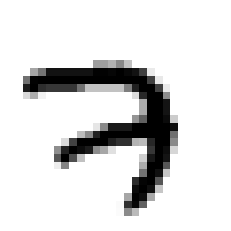

In [172]:
plt.imshow(x_train[0], cmap='binary')
plt.axis('off')

In [173]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [174]:
x_valid.shape

(5000, 28, 28)

In [175]:
y_valid.shape

(5000,)

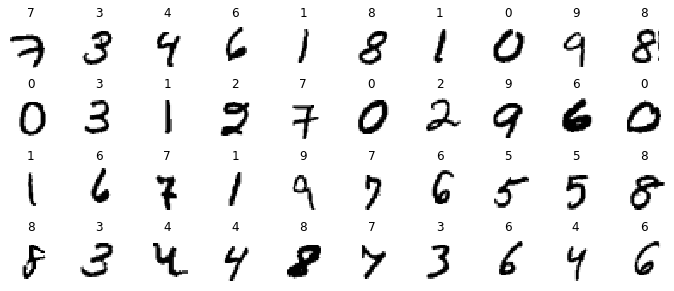

In [183]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(x_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

In [194]:
K = keras.backend

In [195]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [196]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [207]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [208]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [209]:
expon_lr = ExponentialLearningRate(factor=1.005)

In [210]:
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_valid, y_valid), callbacks=[expon_lr])

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 5s 85us/sample - loss: nan - accuracy: 0.5878 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'losses')

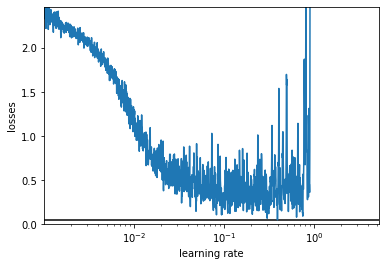

In [211]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel('learning rate')
plt.ylabel('losses')

In [212]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [214]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [215]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=2e-1),
             metrics=['accuracy'])

In [217]:
import os

In [225]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [219]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_mnist_model.h5', save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [220]:
history = model.fit(x_train, y_train, epochs=100,
                   validation_data = (x_valid, y_valid),
                   callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2361 - accuracy: 0.9280 - val_loss: 0.1183 - val_accuracy: 0.9664
Epoch 2/100
55000/55000 [==============================] - 4s 77us/sample - loss: 0.0954 - accuracy: 0.9705 - val_loss: 0.0855 - val_accuracy: 0.9768
Epoch 3/100
55000/55000 [==============================] - 5s 89us/sample - loss: 0.0642 - accuracy: 0.9796 - val_loss: 0.0822 - val_accuracy: 0.9786
Epoch 4/100
55000/55000 [==============================] - 4s 81us/sample - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0804 - val_accuracy: 0.9770
Epoch 5/100
55000/55000 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.98 - 5s 86us/sample - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.1907 - val_accuracy: 0.9500
Epoch 6/100
55000/55000 [==============================] - 4s 78us/sample - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0698 - val_accuracy: 0.9828
Epoch 7/1

In [221]:
model_best = keras.models.load_model('my_mnist_model.h5')
model_best.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.0692 - accuracy: 0.9806


[0.06917384602149541, 0.9806]

In [222]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [223]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_09_15-16_32_29'

In [224]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006